In [1]:
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import plotly.express as px
plt.style.use('ggplot')   
%matplotlib inline

In [2]:
pl_pool=pd.read_csv('plr_pool.csv', parse_dates = ['last_visit'])


In [3]:
pl_pool.head()

,id,visits,last_visit,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean
0,772,86,2024-12-11,-8888.297321,207.294144,-103.352294,31862.0,39.798546,370.488372,316088.953348,394.823954,3675.452946
1,519,170,2024-12-27,-1838.716969,99.844340,-10.815982,12062.0,12.387286,70.952941,120952.522109,124.214345,711.485424
2,265,219,2025-01-01,-4961.336644,108.358339,-22.654505,15893.0,13.844811,72.570776,165878.541263,144.501163,757.436261
3,777,220,2024-12-27,-3743.676149,96.195079,-17.016710,14168.0,12.788631,64.400000,141616.318396,127.828831,643.710538
4,266,180,2025-01-01,-24712.252619,240.443902,-137.290292,70648.0,39.764933,392.488889,693076.583171,390.105080,3850.425462


In [4]:
px.scatter_3d(
    pl_pool,
    x='visits',
    y='hands_sum',
    z='bets_mean',
    color='res_sum'
).show(renderer='browser')

In [5]:
end_date = datetime.strptime("01/1/2025", "%d/%m/%Y")

In [6]:
type(end_date)

datetime.datetime

In [7]:
pl_pool['Recency'] = (end_date-pl_pool.last_visit).dt.days

In [8]:
# rfm_df = pl_pool[['Recency','visits','res_sum']]
rfm_df = pl_pool[['Recency','visits','bets_sum']]
rfm_df.columns = ['Recency', 'Frequency', 'Monetary']

In [9]:
rfm_df

,Recency,Frequency,Monetary
0,21,86,316088.953348
1,5,170,120952.522109
2,0,219,165878.541263
3,5,220,141616.318396
4,0,180,693076.583171
...,...,...,...
95,54,45,175355.670316
96,5,105,451818.036573
97,8,150,598752.267826
98,1,208,138511.407722


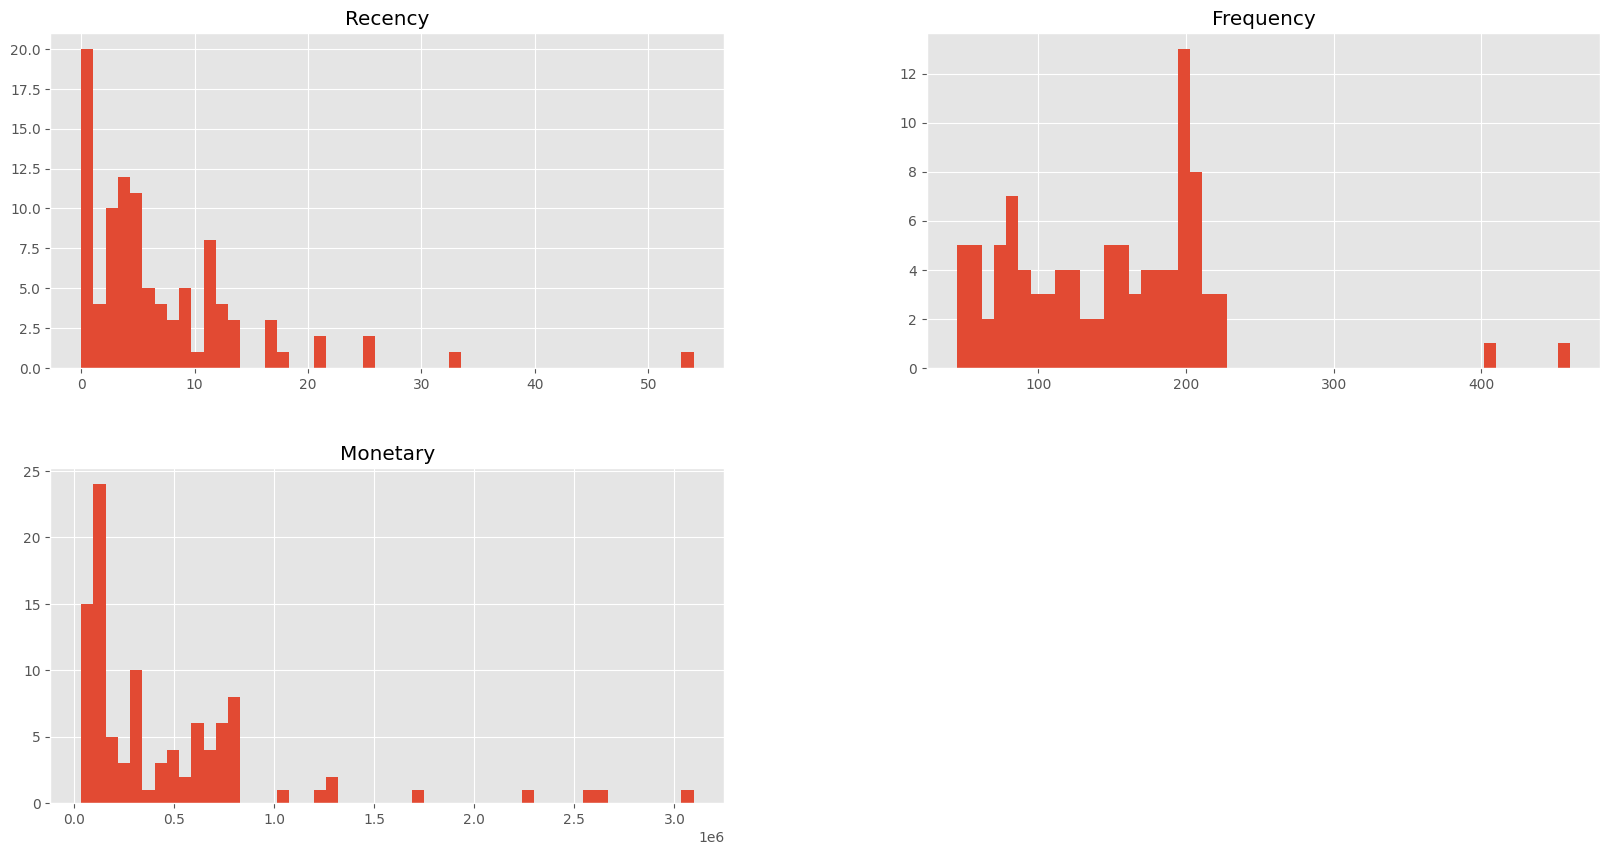

In [10]:
rfm_df[['Recency', 'Frequency', 'Monetary']].hist(figsize=(20,10), bins=50);

In [11]:
# (rfm[['Recency', 'Frequency', 'Monetary']]
#     .apply(lambda w: np.log(w + 1))
#     .hist(figsize=(12,6), bins=30))

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
rfm_df['r_categores'] = pd.qcut(rfm_df['Recency'], q=3, labels=['1', '2', '3'])
rfm_df['f_categores'] = pd.qcut(rfm_df['Frequency'], q=3, labels=['3', '2', '1'])
rfm_df['m_categores'] = pd.qcut(rfm_df['Monetary'], q=3, labels=['1', '2', '3'])



In [14]:
rfm_df

,Recency,Frequency,Monetary,r_categores,f_categores,m_categores
0,21,86,316088.953348,3,3,2
1,5,170,120952.522109,2,2,1
2,0,219,165878.541263,1,1,2
3,5,220,141616.318396,2,1,1
4,0,180,693076.583171,1,2,3
...,...,...,...,...,...,...
95,54,45,175355.670316,3,3,2
96,5,105,451818.036573,2,3,2
97,8,150,598752.267826,3,2,3
98,1,208,138511.407722,1,1,1


In [15]:
rfm_df

,Recency,Frequency,Monetary,r_categores,f_categores,m_categores
0,21,86,316088.953348,3,3,2
1,5,170,120952.522109,2,2,1
2,0,219,165878.541263,1,1,2
3,5,220,141616.318396,2,1,1
4,0,180,693076.583171,1,2,3
...,...,...,...,...,...,...
95,54,45,175355.670316,3,3,2
96,5,105,451818.036573,2,3,2
97,8,150,598752.267826,3,2,3
98,1,208,138511.407722,1,1,1


In [16]:
rfm_df['RFM_RES'] = rfm_df['r_categores'].astype(str) +rfm_df['f_categores'].astype(str) +rfm_df['m_categores'].astype(str) 

In [17]:
rfm_df

,Recency,Frequency,Monetary,r_categores,f_categores,m_categores,RFM_RES
0,21,86,316088.953348,3,3,2,332
1,5,170,120952.522109,2,2,1,221
2,0,219,165878.541263,1,1,2,112
3,5,220,141616.318396,2,1,1,211
4,0,180,693076.583171,1,2,3,123
...,...,...,...,...,...,...,...
95,54,45,175355.670316,3,3,2,332
96,5,105,451818.036573,2,3,2,232
97,8,150,598752.267826,3,2,3,323
98,1,208,138511.407722,1,1,1,111


In [18]:
px.scatter_3d(
    rfm_df,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='RFM_RES'
).show(renderer='browser')